# 2.5 Visual Applications of Machine Learning - Radar Recognition

### Table of Contents 
1. Importing Libraries 
2. Loading and Pre-processing Weather Images 
3. Compiling and Running 
4. Results 

### 1 Setup and Data  

In [13]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [15]:
# Define path to weather dataset and list category folders

path = r"C:\Users\wallm\OneDrive\Desktop\01 CareerFoundry & Datafiles\7.1 - Machine Learning for Analysts - Python\2.5 Visual Applications of Machine Learning\Multi-class Weather Dataset"
folders = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]

print("Found categories:", folders)

Found categories: ['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [17]:
# This generator rescales the image pixel values and sets aside 20% for validation

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)

# Load training images

train_generator = datagenerator.flow_from_directory(
    path,                      # path to main dataset folder
    target_size=(250 , 250),  # resize all images to 250x250
    batch_size=32,
    subset='training',        # take 80% of data for training
)

# Load validation images

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',      # take 20% for validation
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [19]:
# Define the CNN

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5, 5), activation='relu')(inputs)
x = MaxPooling2D((3, 3))(x)
x = Conv2D(64, (5, 5), activation='relu')(x)
x = MaxPooling2D((3, 3))(x)
x = Conv2D(128, (5, 5), activation='relu')(x)
x = MaxPooling2D((3, 3))(x)
x = Flatten()(x)
x = Dropout(0.5, seed=5)(x)
x = Dense(128, activation='relu')(x)

outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# print model structure
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 246, 246, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 82, 82, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 78, 78, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,062,084 (4.05 MB)

 Trainable params: 1,062,084 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile and train the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# Note: Changed loss from 'mean_squared_error' to 'categorical_crossentropy' because this is a multi-class classification task (4 weather categories).
model.fit(
    train_generator,
    epochs=40,  # You can adjust this depending on training time and model performance
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size,
)

C:\Users\wallm\iCloudDrive\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 947ms/step - accuracy: 0.4220 - loss: 1.1347 - val_accuracy: 0.7009 - val_loss: 0.7409
Epoch 2/40
 1/28 ━━━━━━━━━━━━━━━━━━━━ 11s 444ms/step - accuracy: 0.6875 - loss: 0.6595

C:\Users\wallm\iCloudDrive\Python\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6875 - loss: 0.6595 - val_accuracy: 0.6116 - val_loss: 0.8870
Epoch 3/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 589ms/step - accuracy: 0.7245 - loss: 0.6490 - val_accuracy: 0.7009 - val_loss: 0.6523
Epoch 4/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.6250 - loss: 0.7536 - val_accuracy: 0.6875 - val_loss: 0.7018
Epoch 5/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 590ms/step - accuracy: 0.7696 - loss: 0.5741 - val_accuracy: 0.7857 - val_loss: 0.5820
Epoch 6/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9062 - loss: 0.2622 - val_accuracy: 0.8348 - val_loss: 0.4466
Epoch 7/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 581ms/step - accuracy: 0.8383 - loss: 0.5022 - val_accuracy: 0.8482 - val_loss: 0.4245
Epoch 8/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8438 - loss: 0.3804 - val_accuracy: 0.8348 - val_loss: 0.4421
Epoch 9/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 598ms/step - accuracy: 0.8529 - loss: 0.3785 - val_accuracy: 0.7991 - val_

In [23]:
# Save training history to a DataFrame
results = pd.DataFrame(model.history.history)

# Preview the first few rows
results.head()

,accuracy,loss,val_accuracy,val_loss
0,0.537399,0.936974,0.700893,0.740941
1,0.687500,0.659514,0.611607,0.886960
2,0.712313,0.675888,0.700893,0.652278
3,0.625000,0.753611,0.687500,0.701838
4,0.788262,0.529017,0.785714,0.581993


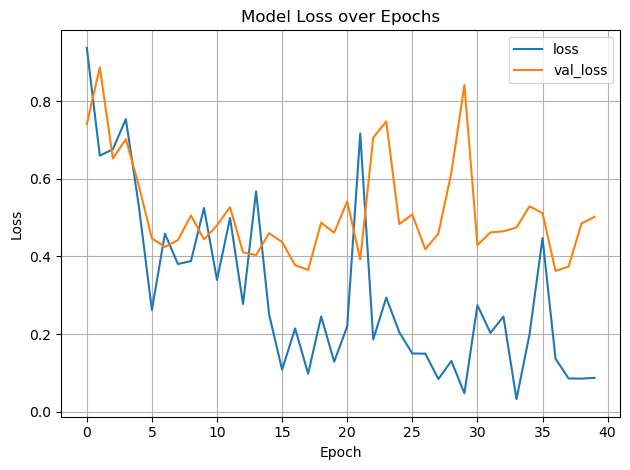

In [25]:
# Plot training and validation loss
results[['loss', 'val_loss']].plot(title='Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('./loss.png')  # Saves to current working directory
plt.show()

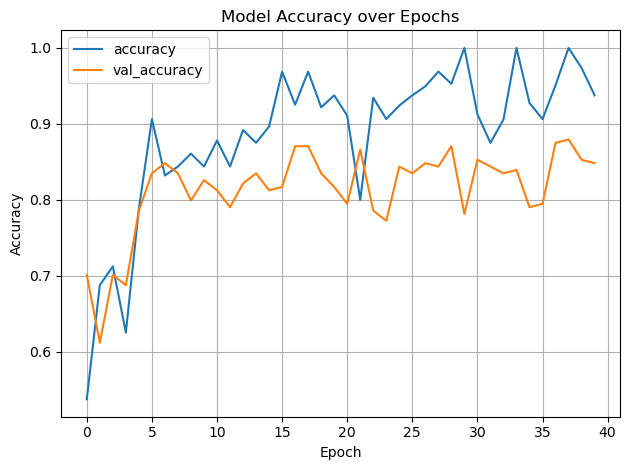

In [27]:
# Plot training and validation accuracy
results[['accuracy', 'val_accuracy']].plot(title='Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('./accuracy.png')  # Saves in the same directory as the notebook
plt.show()

In [29]:
# Print the final accuracy and loss values from the last epoch
train_acc = results['accuracy'].iloc[-1]
val_acc = results['val_accuracy'].iloc[-1]
train_loss = results['loss'].iloc[-1]
val_loss = results['val_loss'].iloc[-1]

print("✅ Final Metrics:")
print(f"Training Accuracy   : {train_acc:.4f}")
print(f"Validation Accuracy : {val_acc:.4f}")
print(f"Training Loss       : {train_loss:.4f}")
print(f"Validation Loss     : {val_loss:.4f}")

✅ Final Metrics:
Training Accuracy   : 0.9375
Validation Accuracy : 0.8482
Training Loss       : 0.0874
Validation Loss     : 0.5020


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step


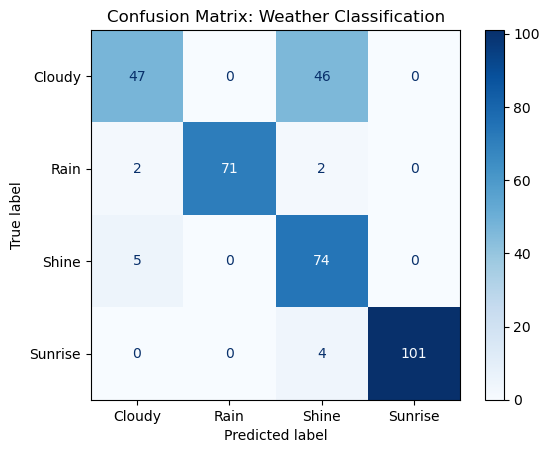

In [31]:
# Define class labels (must match folder names in dataset)

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

n = 10  # Number of batches to collect from the test generator

# Get the first batch of test images and labels
image_batch, classes_batch = next(test_generator)

# Collect additional batches and concatenate them into one larger set
for batch in range(n):
    temp = next(test_generator)  # Get next batch
    image_batch = np.concatenate((image_batch, temp[0]))   # Add images
    classes_batch = np.concatenate((classes_batch, temp[1]))  # Add labels

# Predict weather classes for the collected image batch
y_predict = model.predict(image_batch)

# Convert predictions and true labels from one-hot to class index (0–3)
y_pred_indices = [np.argmax(x) for x in y_predict]
y_true_indices = [np.argmax(x) for x in classes_batch]

# Generate and display the confusion matrix
cm = confusion_matrix(y_true=y_true_indices, y_pred=y_pred_indices)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')  # Optional: add color and formatting
plt.title("Confusion Matrix: Weather Classification")
plt.show()

In [33]:
# This function displays a batch of weather images with their predicted and actual labels.

def predict_one(model, num_images=None):  
    # Load a single batch of images and their corresponding true labels from the test set
    image_batch, classes_batch = next(test_generator)
    
    # Get model predictions (returns softmax probabilities)
    predicted_batch = model.predict(image_batch)
    
    # Loop through the images (either the whole batch or specified number)
    for k in range(0, image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]  # Extract image
        real_class = class_names[np.argmax(classes_batch[k])]  # Convert one-hot to label
        predicted_class = class_names[np.argmax(predicted_batch[k])]  # Same for prediction
        value_predicted = predicted_batch[k]  # Raw prediction vector (probabilities)
        isTrue = (real_class == predicted_class)  # Check if prediction is correct
        
        # Set up plot
        plt.figure(k)
        plt.title(
            ("Correct" if isTrue else "Incorrect") +
            f" — Actual: {real_class} | Predicted: {predicted_class}\n{value_predicted}"
        )
        plt.axis('off')
        
        # Save image with label & prediction in filename
        plt.savefig(f'./{real_class}_{predicted_class}_{str(value_predicted)}.png')
        plt.imshow(image)  # Show image in notebook

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


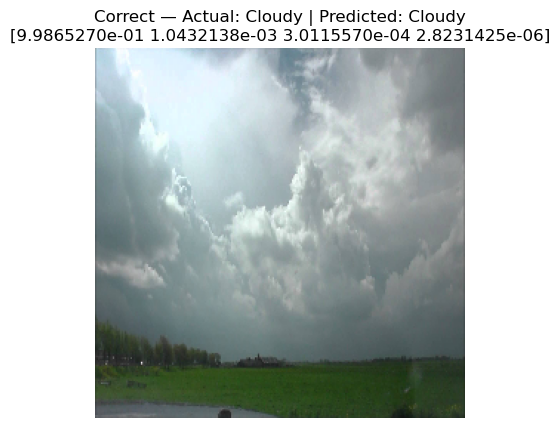

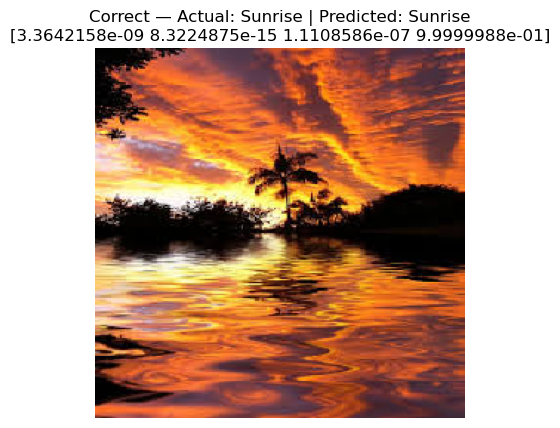

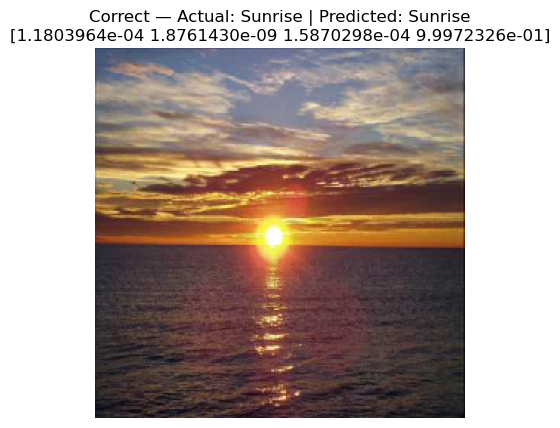

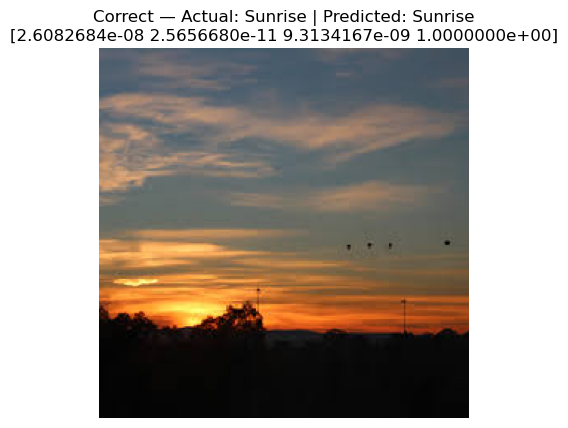

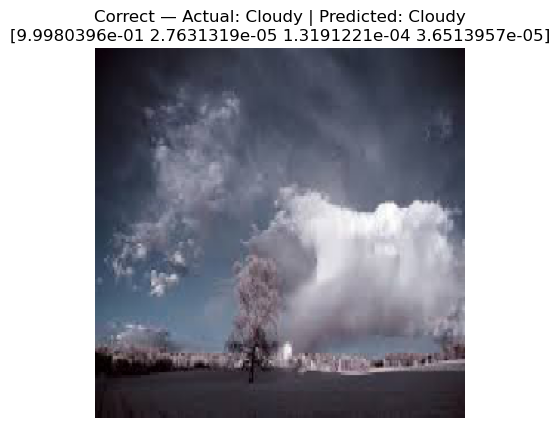

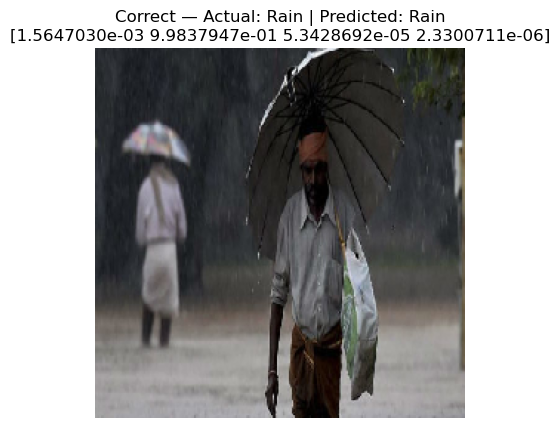

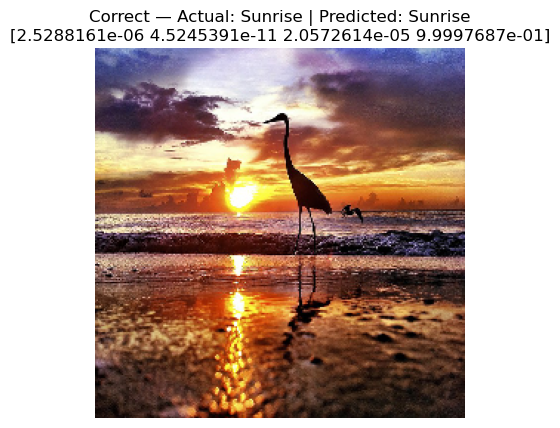

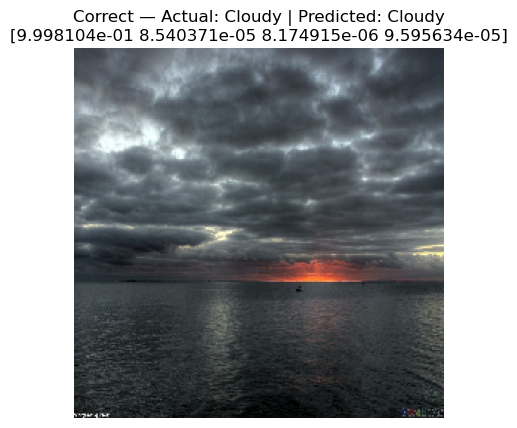

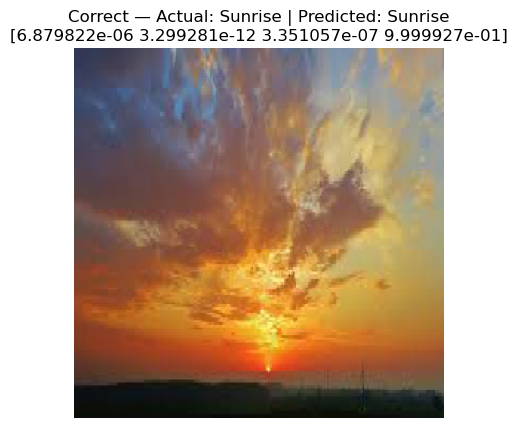

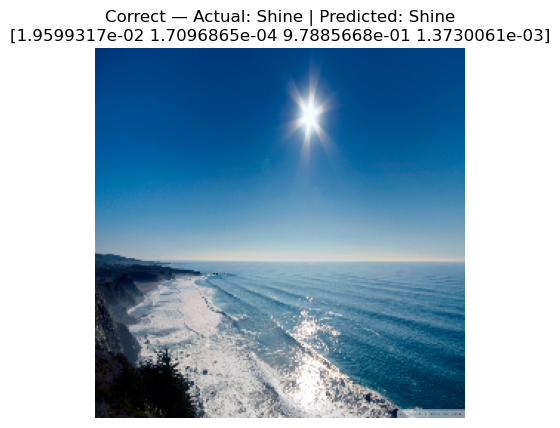

In [35]:
predict_one(model, 10)  # Show predictions for 10 weather images from the test set